In [67]:
import pyowm
import arcpy

In [68]:
import csv
import pyowm
owm = pyowm.OWM('3ac4af53f33d1bb8a67da2676052a1a6')  # You MUST provide a valid API key
L=[]
with open("C:\EsriTraining\RUDN2\Coord_project.csv", "r") as coord_base:
    coord=csv.reader(coord_base)
    for row in coord:
        L.append(row)
A=str(L[0]).split(';')

print(type(A[0].strip('[\'')))

i=0
long=[]
lat=[]
for i in range(len(L)):
    A=str(L[i]).split(';')
    long.append(A[0].strip('[\''))
    lat.append(A[1].strip(']\''))
j=0
for j in range(len(long)):
    long[j]=float(long[j])
    lat[j]=float(lat[j])
        
print(long[10])
print(lat[10])
Rain_amount=[]

for cur in range(len(long)):
    loc=owm.weather_at_coords(lat[cur],long[cur])
    

    w=loc.get_weather()
    rain=w.get_rain()
    if rain=={}:
        rainstr=0
    else:
        rainstr=float(str(rain)[6:-1])
    Rain_amount.append(rainstr)

print(Rain_amount) 


<class 'str'>
-4.408542776
42.79709854
[0.11, 0.12, 0, 0, 0, 0.25, 0, 0, 0.6, 1.37, 0, 0, 0, 0, 0.12, 0, 0, 0, 0.34, 0, 0, 0, 0, 0, 0, 0, 0, 0.54, 1.78, 0, 0.29, 0, 0.14, 0, 0.63, 0.19, 0.19, 0.37, 0.43, 1.78, 0.28, 0, 0.24, 0, 0, 0, 0, 0, 0.35, 0, 0, 0, 0.38, 0, 0, 0, 0, 0.32, 1.36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.67, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.14, 0, 0, 0.37, 1.27, 0.18, 0, 0, 1.27, 0, 1.55, 0, 0.52]


In [17]:
print(lat[1])
print(long[1])
print(lat[2])
print(long[2])

41.82153397
-2.93812604
41.82153397
-1.467709303


In [26]:
loc=owm.weather_at_coords(lat[2],long[2])
w=loc.get_weather()
rain=w.get_rain()
if rain=={}:
    print("true")
else:
    print("false")
print(rain)

true
{}


In [28]:
Rain_amount


[2.05,
 1.63,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2.43,
 0,
 0.76,
 0,
 1.46,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.15,
 0,
 0,
 2.09,
 1.89,
 1.75,
 0.69,
 0,
 0,
 0,
 0,
 2.66,
 0,
 2.59,
 2.69,
 1.15,
 0.32,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2.77,
 1.97,
 0,
 0,
 0,
 0,
 0,
 0.58,
 0.43,
 2.17,
 1.85,
 0,
 0.64,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.24,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
arcpy.env.workspace = "C:/EsriTraining/RUDN2/dorianpro.gdb"
arcpy.Exists(arcpy.env.workspace)


True

In [32]:
featureclasses = arcpy.ListFeatureClasses()
#print(featureclasses)
for fc in featureclasses:
    print(fc)

fishnet_label
fishnet
fishnet_w_coords


In [76]:
sites_layer = arcpy.env.workspace + "/fishnet_w_coords"
layerfields=["*"]


fields=["*"]
i=0
with arcpy.da.UpdateCursor(sites_layer, fields) as cursor:
    for row in cursor:
        print("rain :",Rain_amount[i])
        print(row[10])
        row[10]=Rain_amount[i]
        cursor.updateRow(row)
        print(row[10])
        i=i+1
del cursor
#ucur = arcpy.da.UpdateCursor(full_path + out_name,['SHAPE@X'])

rain : 0.11
None
0.11
rain : 0.12
None
0.12
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0.25
None
0.25
rain : 0
None
0
rain : 0
None
0
rain : 0.6
None
0.6
rain : 1.37
None
1.37
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0.12
None
0.12
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0.34
None
0.34
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0.54
None
0.54
rain : 1.78
None
1.78
rain : 0
None
0
rain : 0.29
None
0.29
rain : 0
None
0
rain : 0.14
None
0.14
rain : 0
None
0
rain : 0.63
None
0.63
rain : 0.19
None
0.19
rain : 0.19
None
0.19
rain : 0.37
None
0.37
rain : 0.43
None
0.43
rain : 1.78
None
1.78
rain : 0.28
None
0.28
rain : 0
None
0
rain : 0.24
None
0.24
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0.35
None
0.35
rain : 0
None
0
rain : 0
None
0
rain : 0
None
0
rain : 0.38
None
0.38
rain : 0
None
0
rain : 0
Non

In [75]:
sites_layer = arcpy.env.workspace + "/fishnet_w_coords"
layerfields=["*"]

arcpy.AddField_management("fishnet_w_coords","Rain_amount4","FLOAT")
print("field created")

field created


In [31]:
with arcpy.da.UpdateCursor(sites_layer, fields) as cursor:
    for row in cursor:
        print(row[8])
        

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.20999999344348907
1.2100000381469727
0.0
0.6100000143051147
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.21999979019165
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.8899999856948853
0.0
0.0
0.8899999856948853
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.17000000178813934
0.0
0.44999998807907104
0.0
0.0
0.0
0.0
0.0
0.949999988079071
0.0
0.11999999731779099
0.0
0.0
0.0
0.0
0.0
0.18000000715255737
0.20000000298023224
0.0
1.2400000095367432
1.0199999809265137
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5299999713897705
0.47999998927116394
0.0
0.0
0.0
0.2800000011920929
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [45]:
root = "C:/EsriTraining/RUDN2/dorianpro.gdb"
nameraster=root + "/" + "IDW1"
if arcpy.Exists(nameraster):
    arcpy.Delete_management(nameraster)
outIDW = arcpy.IDW_ga("fishnet_w_coords", "rain_Amount","",nameraster)
#outIDW.save(nameraster)
outIDW

<Result ''>

In [52]:
root = "C:/EsriTraining/RUDN2/dorianpro.gdb"
nameraster2=root + "/" + "IDW2"
if arcpy.Exists(nameraster2):
    arcpy.Delete_management(nameraster2)
outIDW2 = arcpy.IDW_ga("fishnet_w_coords", "Rain_amount2","",nameraster2)
#outIDW.save(nameraster)
outIDW

<Result ''>

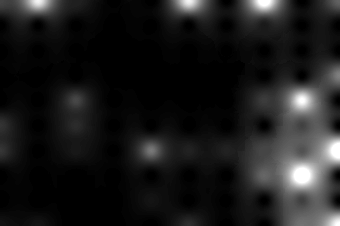

In [74]:
root = "C:/EsriTraining/RUDN2/dorianpro.gdb"
nameraster3=root + "/" + "IDW3"
if arcpy.Exists(nameraster3):
    arcpy.Delete_management(nameraster3)
outIDW3 = arcpy.IDW_ga("fishnet_w_coords", "Rain_amount3","",nameraster3)
#outIDW.save(nameraster)
arcpy.Raster(nameraster3)

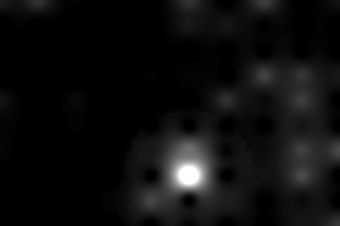

In [73]:
rain_soil=1*arcpy.Raster(nameraster)+0.3 *arcpy.Raster(nameraster2)+arcpy.Raster(nameraster3)
#rain_soilnorm=((rain_soil-rain_soil.minimum)/(rain_soil.maximum - rain_soil.minimum))*100
rain_soil_name=root + "/" + "rain_soil"
if arcpy.Exists(rain_soil_name):
    arcpy.Delete_management(rain_soil_name)
rain_soil.save(rain_soil_name)
rain_soil

In [78]:
arcpy.DeleteField_management("fishnet_w_coords", "Rain_amount3")


<Result 'C:/EsriTraining/RUDN2/dorianpro.gdb\\fishnet_w_coords'>

In [ ]:
fields = arcpy.ListFields(sites_layer)
for field in fields:
    print(field.name)
    